In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [106]:
with open('../results/gains_v1.pickle', 'rb') as f:
    data = pickle.load(f)

In [107]:
mean_costs = data['mean_costs']
cost_change_points = data['cost_change_points']
reward_change_points = data['reward_change_points']

mean_rewards = data['mean_rewards'] 

In [108]:
full_cost_change_points = [1] + cost_change_points + [10000]

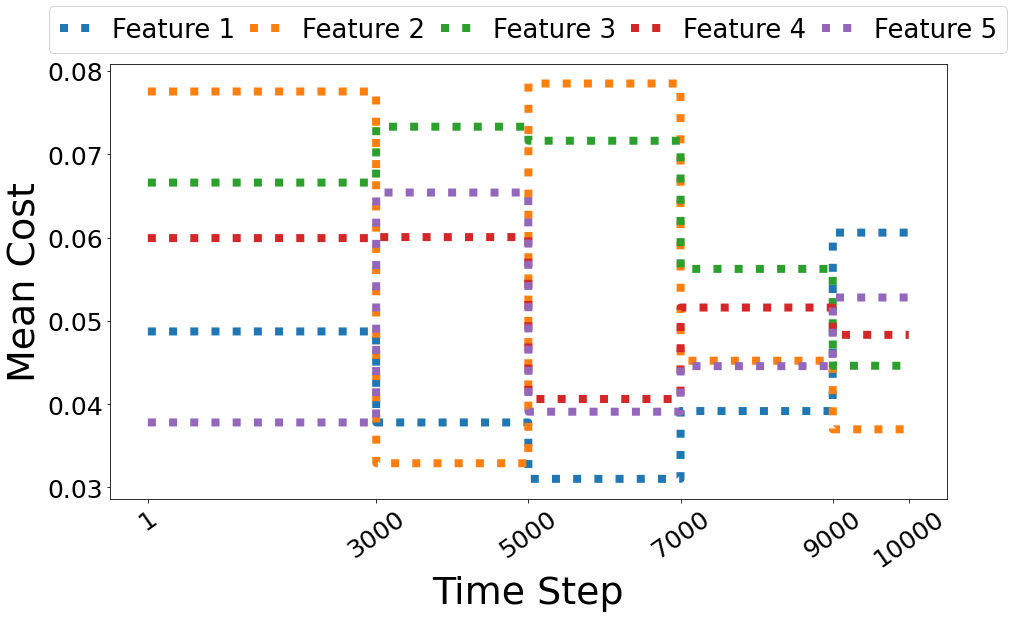

In [190]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
for feature in range(mean_costs.shape[1]):
    ax.plot(
        mean_costs[:, feature], label=f"Feature {feature+1}",
        linewidth=8, linestyle=':',
    )

extraticks = full_cost_change_points
plt.xticks(extraticks, rotation=35, fontsize=25)

plt.yticks(fontsize=25)

ax.set_xlabel('Time Step', fontsize=38)
ax.set_ylabel(fr"Mean Cost", fontsize=38)

# h, l = ax.get_legend_handles_labels()
# lgd1 = ax.legend(
#     h[:3],l[:3],
#     loc=9, ncol=3, bbox_to_anchor=(0.5, 1.252), prop={'size': 26},
    
# )
# lgd2 = ax.legend(
#     h[3:],l[3:],
#     loc=9, ncol=3, bbox_to_anchor=(0.5, 1.142), prop={'size': 26},
    
# )
# ax.add_artist(lgd1)

lgd = ax.legend(
    loc=9, ncol=5, bbox_to_anchor=(0.5, 1.162), prop={'size': 26},
    columnspacing=0.6, handlelength=1.2
)

plt.savefig('nursery_costs.pdf', bbox_inches='tight')

plt.show()

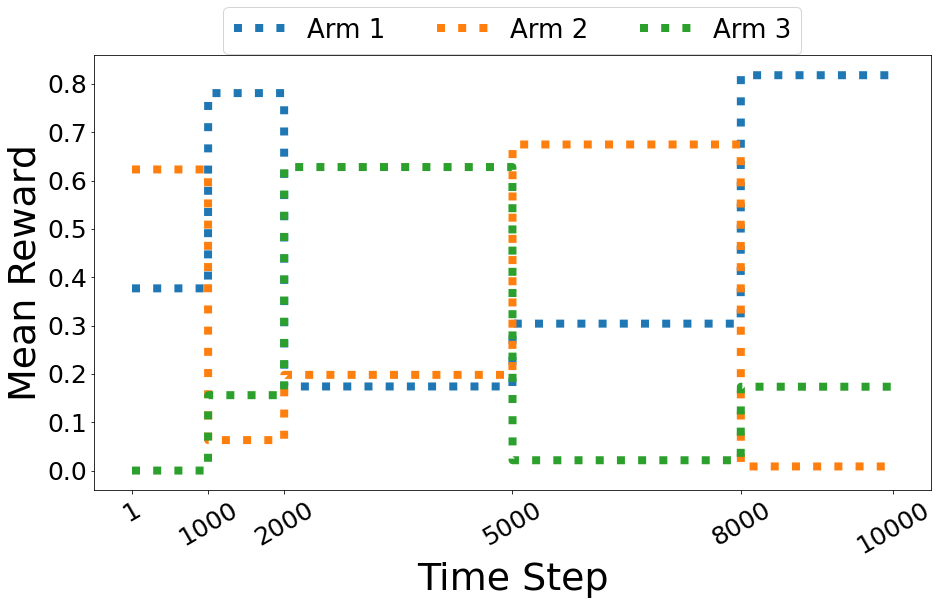

In [111]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
for arm in range(mean_rewards.shape[1]):
    expected_gain = mean_rewards[:, arm] 
    ax.plot(expected_gain, label=f"Arm {arm+1}", linestyle=':', linewidth=8)
#     print(f"Min expected reward for arm {arm}: {min(expected_gain)}")
    
extraticks = reward_change_points
plt.xticks(extraticks, rotation=30, fontsize=25)
plt.yticks(fontsize=25)

ax.set_xlabel('Time Step', fontsize=38)
ax.set_ylabel("Mean Reward", fontsize=38)

lgd = ax.legend(loc=9, ncol=5, bbox_to_anchor=(0.5, 1.141), prop={'size': 26})
plt.savefig('nursery_rewards.pdf', bbox_inches='tight')
plt.show()